In [1]:
# LIBRARIES
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# ROSENBROCK FUNCTION
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

In [3]:
# AUXILIARY FUNCTIONS
# Initialize population
def initialize_population(pop_size, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, 2))

# Fitness function: higher fitness is better, so we minimize the function
def fitness(individual):
    x, y = individual
    return -rosenbrock(x, y)  # Negative because we want to maximize fitness

# Selection function: Tournament selection
def select_parents(population, fitness_values, tournament_size=3):
    selected_parents = []
    for _ in range(2):  # Select two parents
        tournament = random.sample(list(zip(population, fitness_values)), tournament_size)
        tournament = sorted(tournament, key=lambda x: x[1], reverse=True)  # Maximize fitness
        selected_parents.append(tournament[0][0])
    return selected_parents

# Crossover function: Single-point crossover
def crossover(parent1, parent2, crossover_rate=0.9):
    if random.random() < crossover_rate:
        crossover_point = random.randint(0, 1)
        offspring1 = np.copy(parent1)
        offspring2 = np.copy(parent2)
        
        # Swap the genes after the crossover point
        offspring1[crossover_point:] = parent2[crossover_point:]
        offspring2[crossover_point:] = parent1[crossover_point:]
        
        return offspring1, offspring2
    else:
        return np.copy(parent1), np.copy(parent2)

# Mutation function: Gaussian mutation
def mutate(offspring, mutation_rate=0.1, bounds=(-5, 5)):
    if random.random() < mutation_rate:
        mutation = np.random.normal(0, 0.1, size=offspring.shape)
        offspring += mutation
        offspring = np.clip(offspring, bounds[0], bounds[1])  # Ensure within bounds
    return offspring

In [16]:
# GENETIC ALGORITHM
def genetic_algorithm(pop_size=100, generations=200, mutation_rate=0.1, crossover_rate=0.9, bounds=(-5, 5)):
    # Initialize population
    population = initialize_population(pop_size, bounds)
    
    # Track best solution in each generation
    best_solution_path = []
    fitness_over_time = []
    
    # Evolution loop
    best_solution = None
    best_fitness = -np.inf
    
    for generation in range(generations):
        # Calculate fitness values for the current population
        fitness_values = np.array([fitness(ind) for ind in population])

        # Update best solution
        generation_best_fitness = np.max(fitness_values)
        if generation_best_fitness > best_fitness:
            best_fitness = generation_best_fitness
            best_solution = population[np.argmax(fitness_values)]
        
        # Track the best solution's path
        best_solution_path.append(best_solution)
        fitness_over_time.append(best_fitness)
        
        # Print the best solution and its fitness at each generation
        print(f"Generation {generation+1}: Best Solution = {best_solution}, Fitness = {-best_fitness}")
        
        # Create the next generation
        new_population = []
        
        # Perform selection, crossover, and mutation
        while len(new_population) < pop_size:
            parent1, parent2 = select_parents(population, fitness_values)
            offspring1, offspring2 = crossover(parent1, parent2, crossover_rate)
            offspring1 = mutate(offspring1, mutation_rate, bounds)
            offspring2 = mutate(offspring2, mutation_rate, bounds)
            
            new_population.append(offspring1)
            new_population.append(offspring2)
        
        # Replace the old population with the new one
        population = np.array(new_population[:pop_size])
    
    return best_solution, best_fitness, np.array(best_solution_path), np.array(fitness_over_time)

In [19]:
# EXECUTION
best_solution, best_fitness, best_solution_path, fitness_over_time = genetic_algorithm()

print("\nFinal Best Solution: ", best_solution)
print("Fitness of the Best Solution: ", -best_fitness)  # Remember fitness was negated

Generation 1: Best Solution = [1.96176716 3.91273824], Fitness = 1.337261070892802
Generation 2: Best Solution = [1.96176716 3.91273824], Fitness = 1.337261070892802
Generation 3: Best Solution = [0.13670243 0.03777534], Fitness = 0.7817170611410625
Generation 4: Best Solution = [0.13670243 0.03777534], Fitness = 0.7817170611410625
Generation 5: Best Solution = [0.13670243 0.03777534], Fitness = 0.7817170611410625
Generation 6: Best Solution = [0.32236444 0.13332214], Fitness = 0.5456453928057314
Generation 7: Best Solution = [0.35459099 0.13815822], Fitness = 0.43198699649001476
Generation 8: Best Solution = [0.35459099 0.13815822], Fitness = 0.43198699649001476
Generation 9: Best Solution = [0.35459099 0.13815822], Fitness = 0.43198699649001476
Generation 10: Best Solution = [0.46070822 0.22172567], Fitness = 0.29981053949633885
Generation 11: Best Solution = [0.46070822 0.22172567], Fitness = 0.29981053949633885
Generation 12: Best Solution = [0.46070822 0.22172567], Fitness = 0.299

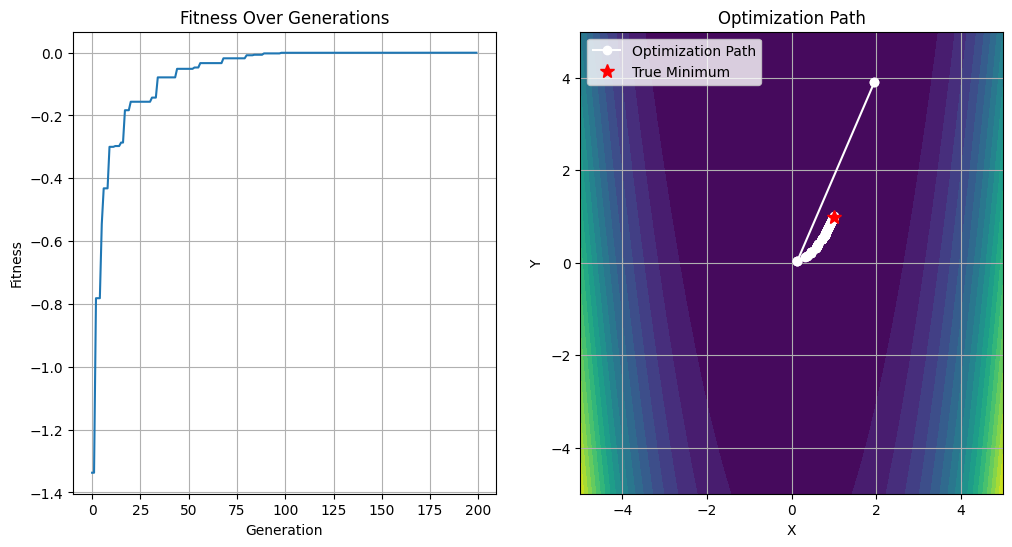

In [20]:
# VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(fitness_over_time)
ax1.set_title("Fitness Over Generations")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.grid(True)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

ax2.contourf(X, Y, Z, levels=20)
ax2.set_title("Optimization Path")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.grid(True)
ax2.plot(best_solution_path[:, 0], best_solution_path[:, 1], 'w-', marker='o', label='Optimization Path')
ax2.plot(1, 1, 'r*', markersize=10, label='True Minimum')
ax2.legend()

plt.show()